# Let's start by reading the contents of the file to understand its structure

In [ ]:
with open("source_files\wtc_oral_hx.txt", "r") as file:
    contents = file.read()

# Display the first 500 characters to get a sense of the file structure


In [33]:
contents[:500]

'Full text of "Copies of EMS interviews related to 9/11/01 (Released via New York Times FOIA request)"\nSee other formats\nFile No. 9110003 \n\n\n\nWORLD TRADE CENTER TASK FORCE INTERVIEW \nCHIEF MARK STEFFENS \n\nInterview Date: October 3, 2001 \n\n\n\nTranscribed by Laurie A. Collins \n\n\n\nM. STEFFENS 2 \n\nMR. McALLISTER: I\'m McAllister from \nthe Bureau of Administration. We\'re \ninterviewing Chief Mark Steffens of Division \n1, formerly the commanding officer at the \nOffice of Medical Affairs. The date of the \n'

In [34]:
import re

# Regular expression to match the pattern of the start of each interview
pattern = r'WORLD TRADE CENTER TASK FORCE INTERVIEW'

# Split the contents based on the pattern
interviews = re.split(pattern, contents)

# Remove potential empty strings due to the split
interviews = [interview for interview in interviews if interview.strip() != '']

# The first element might not be a full interview, let's check it
first_interview = interviews[0]
first_interview[:500]


'Full text of "Copies of EMS interviews related to 9/11/01 (Released via New York Times FOIA request)"\nSee other formats\nFile No. 9110003 \n\n\n\n'

In [35]:
# Discard the first element which is not an interview
interviews = interviews[1:]

# Regular expression to match the interviewee's name and the interview date
name_pattern = r'\n(.+?)\n\nInterview Date:'
date_pattern = r'Interview Date: (.+?) \n'

# Lists to store the names and dates
names = []
dates = []

# Extract the names and dates for each interview
for interview in interviews:
    name_match = re.search(name_pattern, interview)
    names.append(name_match.group(1).strip() if name_match else None)
    
    date_match = re.search(date_pattern, interview)
    dates.append(date_match.group(1).strip() if date_match else None)

# Let's check the first few names and dates
names[:5], dates[:5]


(['CHIEF MARK STEFFENS', None, None, None, None],
 ['October 3, 2001',
  'October 2, 2001',
  'October 3, 2001',
  'October 3, 2001',
  'October 4, 2001'])

In [36]:
# Let's investigate the start of the second interview to understand its structure
second_interview_start = interviews[1][:500]
second_interview_start


" \nPARAMEDIC MANUEL DELGADO \nInterview Date: October 2, 2001 \n\n\n\nTranscribed by Nancy Francis \n\n\n\nM. DELGADO \n\nMR. McALISTER: This is Kevin McAlisterfrom \nthe Bureau of Administration. It is October 2nd at \n2:03 p.m. We're in conference room 8E13 at Fire \nDepartment Headquarters, and in a moment we will begin \ninterviewing Paramedic Manuel Delgado. I'm here today \nwith... \n\nFIRE MARSHAL CAMPBELL: Patrick Campbell, \nFire Marshal. \n\nFIRE MARSHAL STARACE: Michael Starace, Fire \nMarshal. \n\nMR. McALIS"

In [37]:
# Updated regular expression to match the interviewee's name
name_pattern = r'\n(.+?)\nInterview Date:'

# Empty the names list
names = []

# Extract the names for each interview with the updated pattern
for interview in interviews:
    name_match = re.search(name_pattern, interview)
    names.append(name_match.group(1).strip() if name_match else None)

# Let's check the first few names again
names[:5]


[None,
 'PARAMEDIC MANUEL DELGADO',
 'PARAMEDIC JAMES MURPHY',
 'EMT DULCE McCORVEY',
 'LIEUTENANT MURRAY MURAD']

In [38]:
# Create a list of dictionaries for each interview
interview_data = [{'name': name, 'date': date, 'text': text} for name, date, text in zip(names, dates, interviews)]

# Let's check the first interview data
interview_data[0]


{'name': None,
 'date': 'October 3, 2001',
 'text': ' \nCHIEF MARK STEFFENS \n\nInterview Date: October 3, 2001 \n\n\n\nTranscribed by Laurie A. Collins \n\n\n\nM. STEFFENS 2 \n\nMR. McALLISTER: I\'m McAllister from \nthe Bureau of Administration. We\'re \ninterviewing Chief Mark Steffens of Division \n1, formerly the commanding officer at the \nOffice of Medical Affairs. The date of the \ninterview is October 2nd, 200 1 . It is now \n2:47 p.m. This conversation is taking place \nin conference room 8E13 at Fire Department \nheadquarters. \n\nI\'m also joined by — \n\nMR. CAMPBELL: Patrick Campbell, fire \nmarshal. \n\nMR. STERACE: Fire Marshal Michael \nSterace. \n\nMR. McALLISTER: And Chief Mark \nSteffens. \n\nQ. Chief Steffens, I\'d like to draw your \nattention to the date of September the 1 1th, \n2001, and I\'d like for you, in your own words, to \ndescribe your experiences from that day. \n\nA. I normally start work at 9:00, so 8:50 \nI was still home showering, getting ready fo

In [39]:
# Updated regular expressions to match the interviewee's name
# This time, we'll use \s (matches any whitespace character) and * (matches zero or more of the preceding element) 
# to be more flexible regarding the amount of white space
name_pattern_common = r'\n\s*(.+?)\s*\n(?=Interview Date:)'
name_pattern_alt = r'\n\s*(.+?)\s*\n\s*(.+?)\s*\n(?=Interview Date:)'

# Empty the names list
names = []

# Extract the names for each interview with the updated pattern
for interview in interviews:
    # Try the common pattern first
    name_match = re.search(name_pattern_common, interview)
    
    # If no match, try the alternative pattern
    if not name_match:
        name_match = re.search(name_pattern_alt, interview)
        
    # Add the name to the list
    if name_match:
        if name_match.lastindex == 2:  # If there are two groups, join them
            names.append(' '.join([name_match.group(1).strip(), name_match.group(2).strip()]))
        else:  # If there is only one group, use it as is
            names.append(name_match.group(1).strip())
    else:
        names.append(None)

# Let's check the first few names again
names[:5]


['CHIEF MARK STEFFENS',
 'PARAMEDIC MANUEL DELGADO',
 'PARAMEDIC JAMES MURPHY',
 'EMT DULCE McCORVEY',
 'LIEUTENANT MURRAY MURAD']

In [40]:
# Create a list of dictionaries for each interview
interview_data = [{'name': name, 'date': date, 'text': text} for name, date, text in zip(names, dates, interviews)]

# Let's check the first interview data
interview_data[0]


{'name': 'CHIEF MARK STEFFENS',
 'date': 'October 3, 2001',
 'text': ' \nCHIEF MARK STEFFENS \n\nInterview Date: October 3, 2001 \n\n\n\nTranscribed by Laurie A. Collins \n\n\n\nM. STEFFENS 2 \n\nMR. McALLISTER: I\'m McAllister from \nthe Bureau of Administration. We\'re \ninterviewing Chief Mark Steffens of Division \n1, formerly the commanding officer at the \nOffice of Medical Affairs. The date of the \ninterview is October 2nd, 200 1 . It is now \n2:47 p.m. This conversation is taking place \nin conference room 8E13 at Fire Department \nheadquarters. \n\nI\'m also joined by — \n\nMR. CAMPBELL: Patrick Campbell, fire \nmarshal. \n\nMR. STERACE: Fire Marshal Michael \nSterace. \n\nMR. McALLISTER: And Chief Mark \nSteffens. \n\nQ. Chief Steffens, I\'d like to draw your \nattention to the date of September the 1 1th, \n2001, and I\'d like for you, in your own words, to \ndescribe your experiences from that day. \n\nA. I normally start work at 9:00, so 8:50 \nI was still home showering,

In [41]:
# Extract and print the names of all interviewees
interviewee_names = [data['name'] for data in interview_data]
interviewee_names


['CHIEF MARK STEFFENS',
 'PARAMEDIC MANUEL DELGADO',
 'PARAMEDIC JAMES MURPHY',
 'EMT DULCE McCORVEY',
 'LIEUTENANT MURRAY MURAD',
 'PARAMEDIC TRACEY MULQUEEN',
 'EMT FELIPE TORRE',
 'EMT ANTHONY BARTOLOMEY',
 'EMTD CHRISTOPHER KAGENAAR',
 'EMT RUSSELL HARRIS',
 "EMT SORAYA ' DONNELL",
 'RICHARD ERDEY',
 'EMT ERIC HANSEN',
 'EMT JUSTIN LIM',
 'PARAMEDIC KEVIN KELLEHER',
 'PARAMEDIC FELIX MARQUEZ',
 'LIEUTENANT PATRICK SCARINGELLO',
 'PARAMEDIC DANIEL RIVERA',
 'EMT-P ANDRE CHERRINGTON',
 'EMT JUAN RIOS',
 'EMT DANIEL WHITMAN',
 'PARAMEDIC GARY SMILEY',
 'EMT ALAN COOKE',
 'EMT JARJEAN FELTON',
 'JACE PINKUS',
 "EMS CAPTAIN FRANK D'AMATO",
 'EMT PASQUALE FELITTI',
 'LIEUTENANT WILLIAM MELARANGO',
 'EMT BRIAN CIRILLO',
 'EMT ALLEN CRUZ',
 'EMT PATRICIA ONDROVIC',
 'EMT DECOSTA WRIGHT',
 'PARAMEDIC GEORGE BURBANO',
 'PARAMEDIC MARK HARRIS',
 'PARAMEDIC MARC COHEN',
 'EMT VALERIE LONGO',
 'EMT STEPHEN HESS',
 'ABDO NAHMOD',
 'DR. GLENN ASAEDA',
 'LIEUTENANT ROY DAVID',
 'EMT FAISEL ABED',


In [42]:
import pandas as pd

# Split the 'name' field into 'rank' and 'name' (separated by the first space)
rank_name_data = [data['name'].split(' ', 1) for data in interview_data if data['name'] is not None]

# Create a DataFrame
df = pd.DataFrame(rank_name_data, columns=['Rank', 'Name'])

# Display the first 10 rows
df.head(10)


,Rank,Name
0,CHIEF,MARK STEFFENS
1,PARAMEDIC,MANUEL DELGADO
2,PARAMEDIC,JAMES MURPHY
3,EMT,DULCE McCORVEY
4,LIEUTENANT,MURRAY MURAD
5,PARAMEDIC,TRACEY MULQUEEN
6,EMT,FELIPE TORRE
7,EMT,ANTHONY BARTOLOMEY
8,EMTD,CHRISTOPHER KAGENAAR
9,EMT,RUSSELL HARRIS


In [43]:
# Calculate the length (word count) of each interview
for data in interview_data:
    data['length'] = len(data['text'].split())

# Add the lengths to the DataFrame
df['Length'] = [data['length'] for data in interview_data if data['name'] is not None]

# Group by rank and calculate the average length
average_lengths = df.groupby('Rank')['Length'].mean().sort_values(ascending=False)

average_lengths



Rank
BRIAM         14849.000000
ROSARIO        8422.000000
DR.            7834.000000
CHARLES        4456.000000
DAVID          4452.000000
EMS            4274.714286
RICHARD        3968.000000
DOMINICK       3911.000000
CHIEF          3801.000000
JACE           3736.000000
CAPTAIN        3700.200000
ROBERT         3355.000000
PARAMEDIC      3298.962963
LIEUTENANT     2979.818182
EMT            2558.833333
EVELYN         2555.000000
EMT-P          2305.750000
FRANK          2297.000000
MARY           2239.000000
RONALD         2166.000000
EMTD           2122.000000
ROGER          2084.000000
EMT-D          2045.000000
JASON          1785.000000
BARRETT        1739.000000
MR.            1622.000000
Captain        1492.000000
ABDO           1215.000000
CHEVALO        1121.000000
ELOY            961.000000
Name: Length, dtype: float64

In [44]:
# List of known ranks
known_ranks = ['PARAMEDIC', 'EMT', 'LIEUTENANT', 'CHIEF', 'CAPTAIN', 'EMS', 'DR.', 'MR.', 'EMTD', 'EMT-P', 'EMT-D']

# Function to extract the rank from a name
def get_rank(name):
    for rank in known_ranks:
        if name.startswith(rank):
            return rank
    return None

# Extract the rank and update the DataFrame
df['Rank'] = df['Name'].apply(get_rank)

# Group by the updated rank and calculate the average length
average_lengths = df.groupby('Rank')['Length'].mean().sort_values(ascending=False)

average_lengths


Rank
CHIEF         5424.333333
CAPTAIN       4753.000000
LIEUTENANT    1671.000000
Name: Length, dtype: float64

In [45]:
# Split the 'name' field into 'rank' and 'name' (separated by the first space)
rank_name_data = [data['name'].split(' ', 1) for data in interview_data if data['name'] is not None]

# Create a DataFrame
df = pd.DataFrame(rank_name_data, columns=['Rank', 'Name'])

# Add the lengths to the DataFrame
df['Length'] = [data['length'] for data in interview_data if data['name'] is not None]

# Filter the DataFrame
filtered_df = df[df['Rank'].isin(['EMT', 'EMTD', 'PARAMEDIC', 'EMT-P'])]

# Group by rank and calculate the average length
average_lengths_filtered = filtered_df.groupby('Rank')['Length'].mean().sort_values(ascending=False)

average_lengths_filtered


Rank
PARAMEDIC    3298.962963
EMT          2558.833333
EMT-P        2305.750000
EMTD         2122.000000
Name: Length, dtype: float64

In [46]:
# Map 'EMT-P' to 'PARAMEDIC' and 'EMTD' to 'EMT'
df['Rank'] = df['Rank'].replace({'EMT-P': 'PARAMEDIC', 'EMTD': 'EMT'})

# Filter the DataFrame
filtered_df = df[df['Rank'].isin(['EMT', 'PARAMEDIC'])]

# Group by rank and calculate the average length
average_lengths_filtered = filtered_df.groupby('Rank')['Length'].mean().sort_values(ascending=False)

average_lengths_filtered


Rank
PARAMEDIC    3170.806452
EMT          2549.336957
Name: Length, dtype: float64

In [47]:
# Filter the DataFrame to include the ranks 'EMT', 'PARAMEDIC', 'CHIEF', and 'LIEUTENANT'
filtered_df = df[df['Rank'].isin(['EMT', 'PARAMEDIC', 'CHIEF', 'LIEUTENANT'])]

# Group by rank and calculate the average length
average_lengths_filtered = filtered_df.groupby('Rank')['Length'].mean().sort_values(ascending=False)

average_lengths_filtered


Rank
CHIEF         3801.000000
PARAMEDIC     3170.806452
LIEUTENANT    2979.818182
EMT           2549.336957
Name: Length, dtype: float64

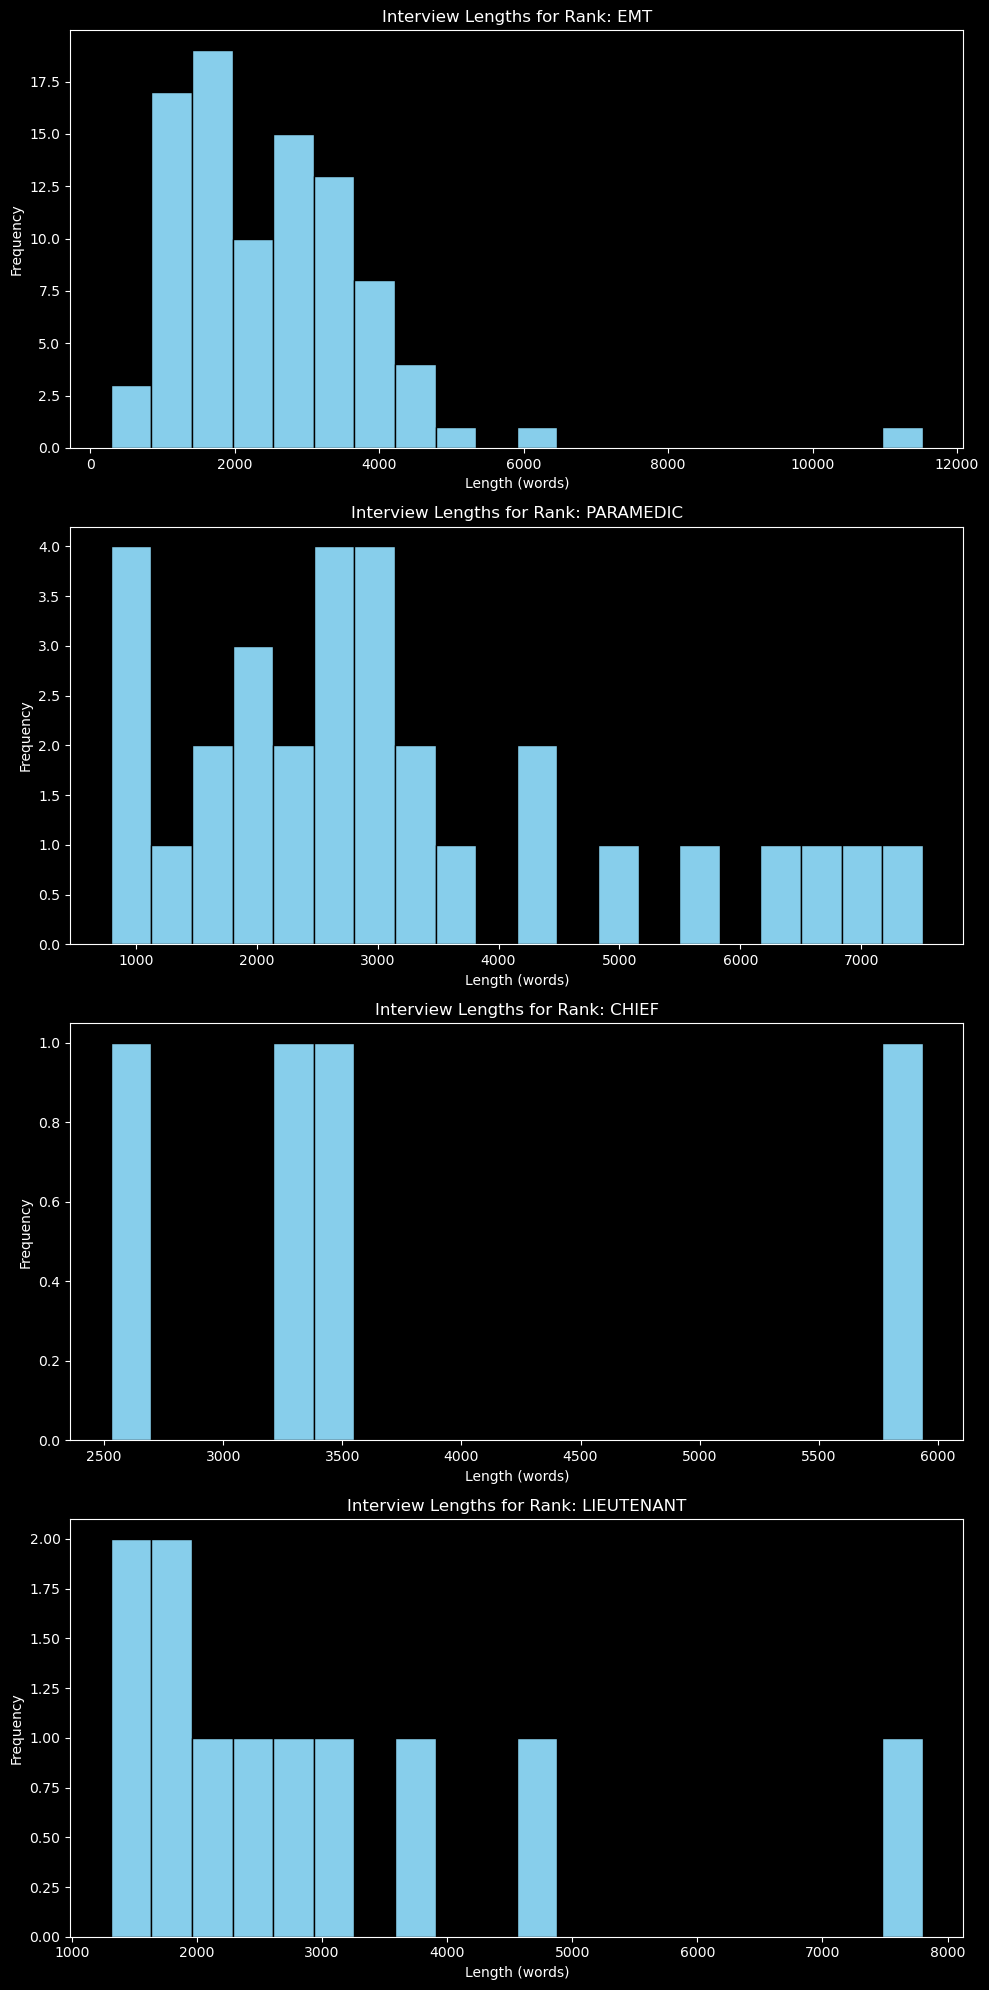

In [48]:
import matplotlib.pyplot as plt

# Define the ranks
ranks = ['EMT', 'PARAMEDIC', 'CHIEF', 'LIEUTENANT']

# Create a figure and axes
fig, axs = plt.subplots(len(ranks), 1, figsize=(10, 5*len(ranks)))

# Plot a histogram for each rank
for i, rank in enumerate(ranks):
    # Filter the DataFrame for the current rank
    df_rank = df[df['Rank'] == rank]
    
    # Plot a histogram of the lengths
    axs[i].hist(df_rank['Length'], bins=20, color='skyblue', edgecolor='black')
    
    # Set the title
    axs[i].set_title(f'Interview Lengths for Rank: {rank}')
    
    # Set the x-label
    axs[i].set_xlabel('Length (words)')
    
    # Set the y-label
    axs[i].set_ylabel('Frequency')

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show()


In [49]:
# Count the number of interviews for each rank
rank_counts = df['Rank'].value_counts()

# Filter the counts for the ranks of interest
rank_counts_filtered = rank_counts[ranks]

rank_counts_filtered


EMT           92
PARAMEDIC     31
CHIEF          4
LIEUTENANT    11
Name: Rank, dtype: int64

In [50]:
# Add the interview texts to the DataFrame
df['text'] = [data['text'] for data in interview_data if data['name'] is not None]

# Preprocess the interview texts
df['processed_text'] = df['text'].apply(preprocess_text)

# Initialize a TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)

# Fit the vectorizer and transform the processed text to get a tf-idf matrix
tfidf_matrix = vectorizer.fit_transform(df['processed_text'])

# Get the feature names (words)
feature_names = np.array(vectorizer.get_feature_names_out())

# Initialize a dictionary to store the top keywords for each rank
top_keywords = defaultdict(list)

# Number of top keywords to extract
n_keywords = 10

# Calculate the top keywords for each rank
for rank in ranks:
    # Get the indices of the interviews for this rank
    indices = df[df['Rank'] == rank].index
    
    # Calculate the mean tf-idf score for each word across the interviews for this rank
    mean_tfidf_scores = tfidf_matrix[indices].mean(axis=0).A1
    
    # Get the indices of the top keywords
    top_indices = np.argsort(mean_tfidf_scores)[::-1][:n_keywords]
    
    # Get the top keywords
    keywords = feature_names[top_indices]
    
    # Store the top keywords
    top_keywords[rank] = keywords

top_keywords


defaultdict(list,
            {'EMT': array(['just', 'like', 'know', 'people', 'got', 'building', 'said',
                    'time', 'went', 'going'], dtype=object),
             'PARAMEDIC': array(['just', 'know', 'like', 'people', 'building', 'got', 'going',
                    'street', 'dont', 'said'], dtype=object),
             'CHIEF': array(['chief', 'going', 'just', 'grant', 'steffens', 'carrasquillo',
                    'gombo', 'got', 'like', 'point'], dtype=object),
             'LIEUTENANT': array(['just', 'street', 'like', 'building', 'people', 'area', 'time',
                    'got', 'went', 'know'], dtype=object)})

In [ ]:
import nltk
nltk.download('wordnet')

In [59]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

# Function to perform lemmatization and remove stop words
def preprocess(text):
    result = []
    for token in simple_preprocess(text):
        if token not in STOPWORDS:
            # Perform lemmatization
            token = WordNetLemmatizer().lemmatize(token, pos='v')
            result.append(token)
    return result

# Preprocess the text
df['tokens'] = df['text'].apply(preprocess)

# Number of topics
num_topics = 5

# Initialize a dictionary to store the topics for each rank
topics = {}

# Perform topic modeling for each rank
for rank in ranks:
    # Get the tokens for the interviews for this rank
    tokens = df[df['Rank'] == rank]['tokens']
    
    # Create a dictionary and corpus for the tokens
    dictionary = Dictionary(tokens)
    corpus = [dictionary.doc2bow(token) for token in tokens]
    
    # Create an LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
    
    # Get the topics
    topics[rank] = lda_model.show_topics(num_topics=num_topics, num_words=5, formatted=False)

topics


{'EMT': [(0,
   [('know', 0.023285871),
    ('like', 0.02107984),
    ('go', 0.019466223),
    ('come', 0.015841376),
    ('build', 0.012201927)]),
  (1,
   [('go', 0.021270385),
    ('like', 0.021062495),
    ('come', 0.019296085),
    ('know', 0.016866213),
    ('get', 0.015170575)]),
  (2,
   [('like', 0.018119091),
    ('go', 0.01805766),
    ('people', 0.016209409),
    ('run', 0.016076937),
    ('know', 0.015975079)]),
  (3,
   [('know', 0.028173601),
    ('go', 0.022716293),
    ('like', 0.021565031),
    ('come', 0.019178165),
    ('say', 0.014359408)]),
  (4,
   [('go', 0.02292872),
    ('like', 0.019569319),
    ('know', 0.018803233),
    ('get', 0.015345297),
    ('people', 0.014107566)])],
 'PARAMEDIC': [(0,
   [('go', 0.02423938),
    ('know', 0.01837444),
    ('get', 0.016925365),
    ('like', 0.013936948),
    ('come', 0.012598016)]),
  (1,
   [('know', 0.021032222),
    ('like', 0.020675093),
    ('people', 0.016367275),
    ('get', 0.0120291915),
    ('go', 0.011693928

In [61]:
# Add 'like', 'know', and 'got' to the stop words
STOPWORDS = STOPWORDS.union(set(['like', 'know', 'got']))

# Preprocess the text again
df['tokens'] = df['text'].apply(preprocess)

# Initialize a dictionary to store the topics for each rank
topics = {}

# Perform topic modeling for each rank
for rank in ranks:
    # Get the tokens for the interviews for this rank
    tokens = df[df['Rank'] == rank]['tokens']
    
    # Create a dictionary and corpus for the tokens
    dictionary = Dictionary(tokens)
    corpus = [dictionary.doc2bow(token) for token in tokens]
    
    # Create an LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
    
    # Get the topics
    topics[rank] = lda_model.show_topics(num_topics=num_topics, num_words=5, formatted=False)

topics



{'EMT': [(0,
   [('go', 0.020910688),
    ('come', 0.017047636),
    ('people', 0.01618006),
    ('run', 0.015891543),
    ('say', 0.013758065)]),
  (1,
   [('go', 0.022579309),
    ('come', 0.02056668),
    ('people', 0.013399372),
    ('build', 0.012285071),
    ('say', 0.01087513)]),
  (2,
   [('go', 0.019879617),
    ('say', 0.017244099),
    ('come', 0.014702304),
    ('start', 0.013141199),
    ('run', 0.012716905)]),
  (3,
   [('go', 0.022826537),
    ('come', 0.020643596),
    ('say', 0.0116081275),
    ('people', 0.011607608),
    ('build', 0.01113446)]),
  (4,
   [('go', 0.02388836),
    ('people', 0.014909318),
    ('run', 0.014181061),
    ('come', 0.013928434),
    ('build', 0.013134721)])],
 'PARAMEDIC': [(0,
   [('go', 0.023922868),
    ('people', 0.016329013),
    ('come', 0.014943801),
    ('say', 0.013752406),
    ('start', 0.012689816)]),
  (1,
   [('go', 0.023251371),
    ('build', 0.015494527),
    ('right', 0.012008744),
    ('people', 0.011376304),
    ('come', 0

In [62]:
# Add 'people', 'going', and 'remember' to the stop words
STOPWORDS = STOPWORDS.union(set(['people', 'going', 'remember']))

# Preprocess the text again
df['tokens'] = df['text'].apply(preprocess)

# Initialize a dictionary to store the topics for each rank
topics = {}

# Perform topic modeling for each rank
for rank in ranks:
    # Get the tokens for the interviews for this rank
    tokens = df[df['Rank'] == rank]['tokens']
    
    # Create a dictionary and corpus for the tokens
    dictionary = Dictionary(tokens)
    corpus = [dictionary.doc2bow(token) for token in tokens]
    
    # Create an LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
    
    # Get the topics
    topics[rank] = lda_model.show_topics(num_topics=num_topics, num_words=5, formatted=False)

topics


{'EMT': [(0,
   [('come', 0.017288048),
    ('say', 0.016770257),
    ('start', 0.0138210105),
    ('build', 0.013771824),
    ('run', 0.013199595)]),
  (1,
   [('come', 0.020933336),
    ('build', 0.01270283),
    ('street', 0.0125547815),
    ('run', 0.012523149),
    ('go', 0.012447727)]),
  (2,
   [('come', 0.014548217),
    ('say', 0.013974794),
    ('run', 0.012820137),
    ('build', 0.012797721),
    ('right', 0.011410371)]),
  (3,
   [('come', 0.020623628),
    ('run', 0.013016648),
    ('go', 0.011979164),
    ('build', 0.011875096),
    ('time', 0.011664599)]),
  (4,
   [('say', 0.016638774),
    ('run', 0.01570323),
    ('come', 0.014011566),
    ('build', 0.012961439),
    ('go', 0.01277539)])],
 'PARAMEDIC': [(0,
   [('come', 0.014668847),
    ('start', 0.012335493),
    ('say', 0.011229262),
    ('build', 0.011058174),
    ('run', 0.010974827)]),
  (1,
   [('build', 0.017952994),
    ('come', 0.015270737),
    ('say', 0.014079753),
    ('run', 0.011437937),
    ('right', 

In [64]:
# Perform topic modeling for each rank
for rank in ranks:
    # Get the tokens for the interviews for this rank
    tokens = df[df['Rank'] == rank]['tokens'].tolist()
    
    # Form bigrams
    bigram = Phrases(tokens, min_count=5)
    for idx in range(len(tokens)):
        for token in bigram[tokens[idx]]:
            if '_' in token:  # bigrams can be recognized by the "_" that joins the individual words
                tokens[idx].append(token)
    
    # Create a dictionary and corpus for the tokens
    dictionary = Dictionary(tokens)
    corpus = [dictionary.doc2bow(token) for token in tokens]
    
    # Create an LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
    
    # Get the topics
    topics[rank] = lda_model.show_topics(num_topics=num_topics, num_words=5, formatted=False)

topics




{'EMT': [(0,
   [('first', 0.21046647),
    ('ambulance', 0.13958207),
    ('emt', 0.09561464),
    ('hospital', 0.061866734),
    ('triage', 0.056521937)]),
  (1,
   [('first', 0.13995343),
    ('equipment', 0.11794992),
    ('ambulance', 0.116045006),
    ('vehicle', 0.10197604),
    ('triage', 0.09342124)]),
  (2,
   [('emt', 0.14680259),
    ('equipment', 0.119783185),
    ('triage', 0.07955353),
    ('scene', 0.073195584),
    ('first', 0.07042563)]),
  (3,
   [('ambulance', 0.16645469),
    ('first', 0.14782503),
    ('hospital', 0.12959889),
    ('vehicle', 0.09948891),
    ('emt', 0.080918245)]),
  (4,
   [('vehicle', 0.17901272),
    ('ambulance', 0.14922841),
    ('first', 0.12739807),
    ('emt', 0.10367019),
    ('triage', 0.094533265)])],
 'PARAMEDIC': [(0,
   [('vehicle', 0.16040032),
    ('paramedic', 0.16024883),
    ('ambulance', 0.15558153),
    ('first', 0.10451577),
    ('emt', 0.08102259)]),
  (1,
   [('triage', 0.13737868),
    ('first', 0.12495456),
    ('vehicle

In [66]:
# Define a list of words related to location
location_words = ['street', 'building', 'north', 'south', 'east', 'west', 'up', 'down', 'inside', 'outside', 
                  'location', 'place', 'area', 'direction', 'left', 'right', 'front', 'back', 'side', 'corner', 
                  'top', 'bottom', 'here', 'there', 'where', 'map', 'position', 'site', 'venue', 'spot', 'route',
                  'road', 'avenue', 'highway', 'lane', 'boulevard', 'way', 'drive', 'parkway', 'place', 'square']

# Initialize a dictionary to store the frequency of location words for each rank
location_word_counts = {}

# Count the frequency of location words for each rank
for rank in ranks:
    # Get the tokens for the interviews for this rank
    tokens = df[df['Rank'] == rank]['tokens']
    
    # Flatten the list of tokens and convert it to a pandas Series
    tokens = pd.Series([token for sublist in tokens for token in sublist])
    
    # Count the frequency of each token
    token_counts = tokens.value_counts()
    
    # Get the frequency of location words
    location_word_counts[rank] = token_counts.loc[token_counts.index.intersection(location_words)].sum()

location_word_counts

# Redefine the preprocessing function without stopword removal
def preprocess(text):
    result = []
    for token in simple_preprocess(text):
        result.append(token)
    return result

# Preprocess the text again without removing stopwords
df['tokens'] = df['text'].apply(preprocess)

# Initialize a dictionary to store the frequency of location words for each rank
location_word_counts = {}

# Count the frequency of location words for each rank
for rank in ranks:
    # Get the tokens for the interviews for this rank
    tokens = df[df['Rank'] == rank]['tokens']
    
    # Flatten the list of tokens and convert it to a pandas Series
    tokens = pd.Series([token for sublist in tokens for token in sublist])
    
    # Count the frequency of each token
    token_counts = tokens.value_counts()
    
    # Get the frequency of location words
    location_word_counts[rank] = token_counts.loc[token_counts.index.intersection(location_words)].sum()

location_word_counts


{'EMT': 14634, 'PARAMEDIC': 6478, 'CHIEF': 996, 'LIEUTENANT': 2130}

In [67]:
# Initialize a dictionary to store the proportion of location words for each rank
location_word_proportions = {}

# Calculate the proportion of location words for each rank
for rank in ranks:
    # Get the tokens for the interviews for this rank
    tokens = df[df['Rank'] == rank]['tokens']
    
    # Flatten the list of tokens and convert it to a pandas Series
    tokens = pd.Series([token for sublist in tokens for token in sublist])
    
    # Get the total number of tokens
    total_tokens = len(tokens)
    
    # Get the number of location words
    num_location_words = location_word_counts[rank]
    
    # Calculate the proportion of location words
    location_word_proportions[rank] = num_location_words / total_tokens

location_word_proportions


{'EMT': 0.06932587995641669,
 'PARAMEDIC': 0.07268769425836784,
 'CHIEF': 0.07136715391229578,
 'LIEUTENANT': 0.07239234612378072}

In [68]:
# Check if there are interviews with Goldfarb or Merced
interviewees_with_Goldfarb_or_Merced = df[df['Name'].str.contains('Goldfarb|Merced', case=False, na=False)]
interviewees_with_Goldfarb_or_Merced


,Rank,Name,Length,text,processed_text,tokens
92,EMT,MARY MERCED,3538,\n\nEMT MARY MERCED \n\nInterview Date: Octob...,\n\nemt mary merced \n\ninterview date octobe...,"[emt, mary, merced, interview, date, october, ..."
93,EMS,CHIEF ZACHARY GOLDFARB,14328,\nEMS CHIEF ZACHARY GOLDFARB \nInterview Date...,\nems chief zachary goldfarb \ninterview date...,"[ems, chief, zachary, goldfarb, interview, dat..."


In [69]:
# Extract interviews that mention Goldfarb or Merced
relevant_interviews = df[df['text'].str.contains('Goldfarb|Merced', case=False, na=False)]
relevant_interviews


,Rank,Name,Length,text,processed_text,tokens
21,PARAMEDIC,GARY SMILEY,4199,\nPARAMEDIC GARY SMILEY \nInterview Date: Oct...,\nparamedic gary smiley \ninterview date octo...,"[paramedic, gary, smiley, interview, date, oct..."
24,JACE,PINKUS,3736,\n\nJACE PINKUS \n\nInterview Date: October 1...,\n\njace pinkus \n\ninterview date october ...,"[jace, pinkus, interview, date, october, trans..."
44,LIEUTENANT,RENE DAVILA,7802,\nLIEUTENANT RENE DAVILA \nInterview Date: Oc...,\nlieutenant rene davila \ninterview date oct...,"[lieutenant, rene, davila, interview, date, oc..."
45,EMS,CAPTAIN MARK STONE,5844,\nEMS CAPTAIN MARK STONE \nInterview Date: Oc...,\nems captain mark stone \ninterview date oct...,"[ems, captain, mark, stone, interview, date, o..."
50,PARAMEDIC,JOSEPH CAHILL,5593,\n\nPARAMEDIC JOSEPH CAHILL \n\nInterview Dat...,\n\nparamedic joseph cahill \n\ninterview dat...,"[paramedic, joseph, cahill, interview, date, o..."
59,PARAMEDIC,ERIC RODRIGUEZ,2619,\nEMT-P ERIC RODRIGUEZ \nInterview Date: Octo...,\nemtp eric rodriguez \ninterview date octobe...,"[emt, eric, rodriguez, interview, date, octobe..."
60,EMS,CHIEF WALTER KOWALCZYK,3693,\nEMS CHIEF WALTER KOWALCZYK \nInterview Date...,\nems chief walter kowalczyk \ninterview date...,"[ems, chief, walter, kowalczyk, interview, dat..."
63,CHIEF,JERRY GOMBO,5937,\n\nCHIEF JERRY GOMBO \n\nInterview Date: Oct...,\n\nchief jerry gombo \n\ninterview date octo...,"[chief, jerry, gombo, interview, date, october..."
65,EMS,CHIEF FRAN PASCALE,6905,\nEMS CHIEF FRAN PASCALE \nInterview Date: Oc...,\nems chief fran pascale \ninterview date oct...,"[ems, chief, fran, pascale, interview, date, o..."
92,EMT,MARY MERCED,3538,\n\nEMT MARY MERCED \n\nInterview Date: Octob...,\n\nemt mary merced \n\ninterview date octobe...,"[emt, mary, merced, interview, date, october, ..."


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
import numpy as np

# Function to preprocess the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove digits
    text = re.sub(r'\d+', '', text)
    
    return text

# Preprocess the interview texts
df['processed_text'] = df['text'].apply(preprocess_text)

# Initialize a TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)

# Fit the vectorizer and transform the processed text to get a tf-idf matrix
tfidf_matrix = vectorizer.fit_transform(df['processed_text'])

# Get the feature names (words)
feature_names = np.array(vectorizer.get_feature_names_out())

# Initialize a dictionary to store the top keywords for each rank
top_keywords = defaultdict(list)

# Number of top keywords to extract
n_keywords = 10

# Calculate the top keywords for each rank
for rank in ranks:
    # Get the indices of the interviews for this rank
    indices = df[df['Rank'] == rank].index
    
    # Calculate the mean tf-idf score for each word across the interviews for this rank
    mean_tfidf_scores = tfidf_matrix[indices].mean(axis=0).A1
    
    # Get the indices of the top keywords
    top_indices = np.argsort(mean_tfidf_scores)[::-1][:n_keywords]
    
    # Get the top keywords
    keywords = feature_names[top_indices]
    
    # Store the top keywords
    top_keywords[rank] = keywords

top_keywords


defaultdict(list,
            {'EMT': array(['just', 'like', 'know', 'people', 'got', 'building', 'said',
                    'time', 'went', 'going'], dtype=object),
             'PARAMEDIC': array(['just', 'know', 'like', 'people', 'building', 'got', 'going',
                    'street', 'dont', 'said'], dtype=object),
             'CHIEF': array(['chief', 'going', 'just', 'grant', 'steffens', 'carrasquillo',
                    'gombo', 'got', 'like', 'point'], dtype=object),
             'LIEUTENANT': array(['just', 'street', 'like', 'building', 'people', 'area', 'time',
                    'got', 'went', 'know'], dtype=object)})